### RECURSIVE FEATURE ELIMINATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, roc_auc_score

In [3]:
# Data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Data Description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
# Input Features
X = pd.DataFrame(data = data.data, columns=data.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Target
y = data.target
y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((455, 30), (114, 30))

### Feature Selection by feature importance of Random forest Classifier

In [8]:
feat_selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1),)
feat_selector.fit(X_train, y_train)
feat_selector.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [9]:
# Number of features selected
np.sum(feat_selector.get_support())

10

SelectFromModel by default uses the mean of the feature importances value as the threshold to select the features. Features having feature importance greater than the mean value are selected and rest are removed.

In [10]:
np.mean(feat_selector.estimator_.feature_importances_)

0.03333333333333333

In [11]:
feat_selector.estimator_.feature_importances_

array([0.03699612, 0.01561296, 0.06016409, 0.0371452 , 0.0063401 ,
       0.00965994, 0.0798662 , 0.08669071, 0.00474992, 0.00417092,
       0.02407355, 0.00548033, 0.01254423, 0.03880038, 0.00379521,
       0.00435162, 0.00452503, 0.00556905, 0.00610635, 0.00528878,
       0.09556258, 0.01859305, 0.17205401, 0.05065305, 0.00943096,
       0.01565491, 0.02443166, 0.14202709, 0.00964898, 0.01001304])

In [12]:
# Transforming the data according to the features selected
X_train_SFM = feat_selector.transform(X_train)
X_test_SFM = feat_selector.transform(X_test)

In [13]:
# Define a function to create a model and report the results
def modeling(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'AUC Score: {roc_auc_score(y_test, y_pred_prob)}')

#### Modeling with all the features

In [14]:

%%time
modeling(X_train, X_test, y_train, y_test)

Accuracy: 0.9649122807017544
AUC Score: 0.9965068275643061
Wall time: 723 ms


#### Modeling with the selected features

In [15]:

%%time
modeling(X_train_SFM, X_test_SFM, y_train, y_test)

Accuracy: 0.9473684210526315
AUC Score: 0.9939663385201651
Wall time: 645 ms


Even though the Accuracy and AUC scores have deacreased after feature selection, but we have significantly reduced the number of features from 30 to 10 and the decrease in the scores are minimal.

### Recursive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
feat_sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 15)
feat_sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [17]:
feat_sel.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [18]:
# Features Selected
X_train.columns[feat_sel.get_support()]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

In [19]:
# Transform the data with the features selected
X_train_RFE = feat_sel.transform(X_train)
X_test_RFE = feat_sel.transform(X_test)

In [20]:

%%time
modeling(X_train_RFE, X_test_RFE, y_train, y_test)

Accuracy: 0.9736842105263158
AUC Score: 0.9974595109558589
Wall time: 693 ms


With Recursive feature elimination we can now see we got better Accuracy and AUC score compared to the original model with all features and feature selection from feature importance from Random Forest.

### Feature Selection by Gradient Boost Tree

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
feat_sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=12)
feat_sel.fit(X_train,y_train)

RFE(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
  n_features_to_select=12, step=1, verbose=0)

In [23]:
#features selected
X_train.columns[feat_sel.get_support()]

Index(['mean texture', 'mean smoothness', 'mean concave points',
       'mean symmetry', 'area error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

In [24]:
# Transform the data
X_train_GBC = feat_sel.transform(X_train)
X_test_GBC = feat_sel.transform(X_test)

In [25]:
%%time
modeling(X_train_GBC, X_test_GBC, y_train, y_test)

Accuracy: 0.9736842105263158
AUC Score: 0.9971419498253414
Wall time: 572 ms


We have similr result as the Random Forest model, but have less features.

### Selecting the optimal number of Features

We have been manually specifying the number of features to select with Recursive feature elimination, now we will see what is the optimal number of features using a for loop.

In [26]:
def modeling(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    Accuracy = accuracy_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred_prob)
    return Accuracy, AUC

In [27]:
# Variables to store scores at corresponding number of features selected
Features =  []
Accuracy =  []
AUC      =  []

for index in range(1,31):
    selector = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=index)
    selector.fit(X_train, y_train)
    X_train_rfe = selector.transform(X_train)
    X_test_rfe = selector.transform(X_test)
    # run the modeling
    scores =  modeling(X_train_rfe, X_test_rfe, y_train, y_test)
    Features.append(index)
    Accuracy.append(scores[0])
    AUC.append(scores[1])
    

In [28]:
score_dict = {'Features': Features, 'Accuracy':Accuracy, 'AUC':AUC}
scores_df = pd.DataFrame(score_dict)
scores_df

,Features,Accuracy,AUC
0,1,0.877193,0.942839
1,2,0.903509,0.956177
2,3,0.964912,0.996666
3,4,0.973684,0.998730
4,5,0.964912,0.998095
5,6,0.991228,0.998730
6,7,0.973684,0.996507
7,8,0.964912,0.997460
8,9,0.973684,0.997142
9,10,0.956140,0.996507


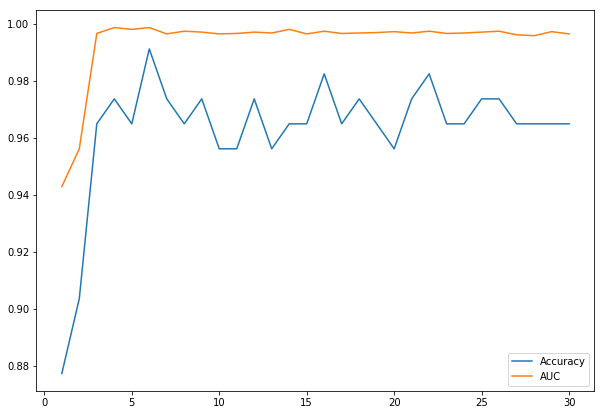

In [29]:
# Visualize the Result
plt.figure(figsize = (10,7))
plt.plot(scores_df.Features, scores_df.Accuracy, label = 'Accuracy')
plt.plot(scores_df.Features, scores_df.AUC, label = 'AUC')
plt.legend()

 From the plot we can see that by selecting only 6 features we can achive the highest Accuracy and AUC score.Also AUC score does not change much after that.

### Final Model

In [30]:
selector = RFE(GradientBoostingClassifier(n_estimators = 100, random_state=0), n_features_to_select=6)
selector.fit(X_train,y_train)
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

In [31]:
# Modeling
scores = modeling(X_train_rfe, X_test_rfe, y_train,y_test)
print(f'Accuracy: {scores[0]}')
print(f'AUC : {scores[1]}')

Accuracy: 0.9912280701754386
AUC : 0.9987297554779294
